# Checking if modified CAMB is functional and providing correct results

In [1]:
import camb
import matplotlib.pyplot as plt
import numpy as np

## $\Lambda\mathrm{CDM}$

In [2]:
lcdm = camb.read_ini("./inifiles/beta_test.ini")
lcdm_results = camb.get_results(lcdm)
lcdm_powers = lcdm_results.get_cmb_power_spectra(lcdm, CMB_unit="muK")
lcdm_Cl = lcdm_powers["total"]
lmax = lcdm_Cl.shape[0] - 1
aL = np.arange(lcdm_Cl.shape[0])

## CPL parameterisation

In [ ]:
# wa = 0.02
# beta = 1

cpl = lcdm
cpl.DarkEnergy.wa = 0.02
cpl.DarkEnergy.beta_DE = 1

cpl_results = camb.get_results(cpl)
cpl_powers = cpl_results.get_cmb_power_spectra(cpl, CMB_unit="muK")
cpl_Cl = cpl_powers["total"]

 integral, error, tol:   13447.619649066204       -3.1295394742336669E-007   1.0000000000000001E-007


CAMBError: Error in Fortran called from calc_transfer:
ThemoData Init: failed to find end of recombination

## Plotting

### Separately

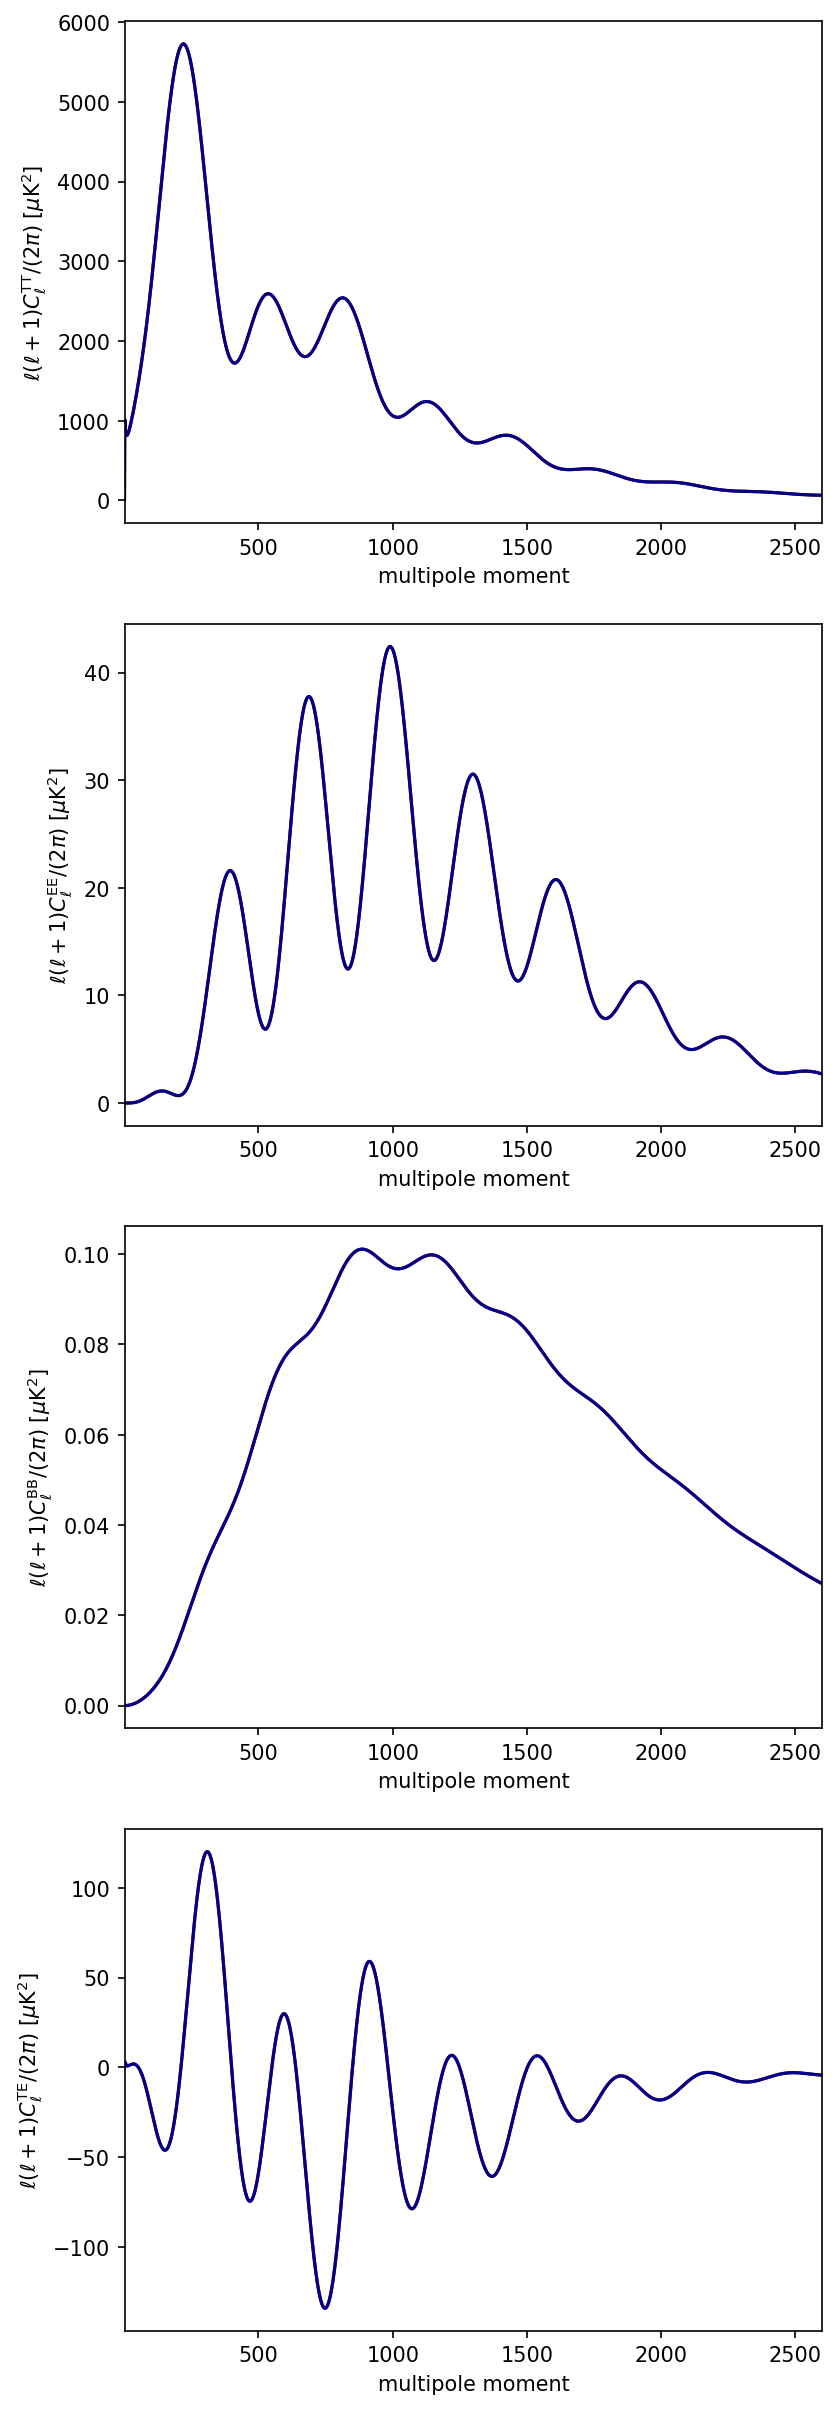

In [7]:
fig = plt.figure(figsize=(6, 20), dpi=150)
for pindx, ll in zip(range(4), ["TT", "EE", "BB", "TE"]):
    ax = fig.add_subplot(4, 1, pindx + 1)
    # starting from dipole onwards
    ax.set_xlim(2, lmax)
    ax.set_xlabel("multipole moment")
    ax.set_ylabel("$\ell(\ell+1)C_\ell^{\\rm " + ll + "}/(2\pi)$ [$\mu{\\rm K}^2$]")
    ax.plot(aL, lcdm_Cl[:, pindx], c="DarkRed")
    ax.plot(aL, cpl_Cl[:, pindx], c="DarkBlue")

### Difference

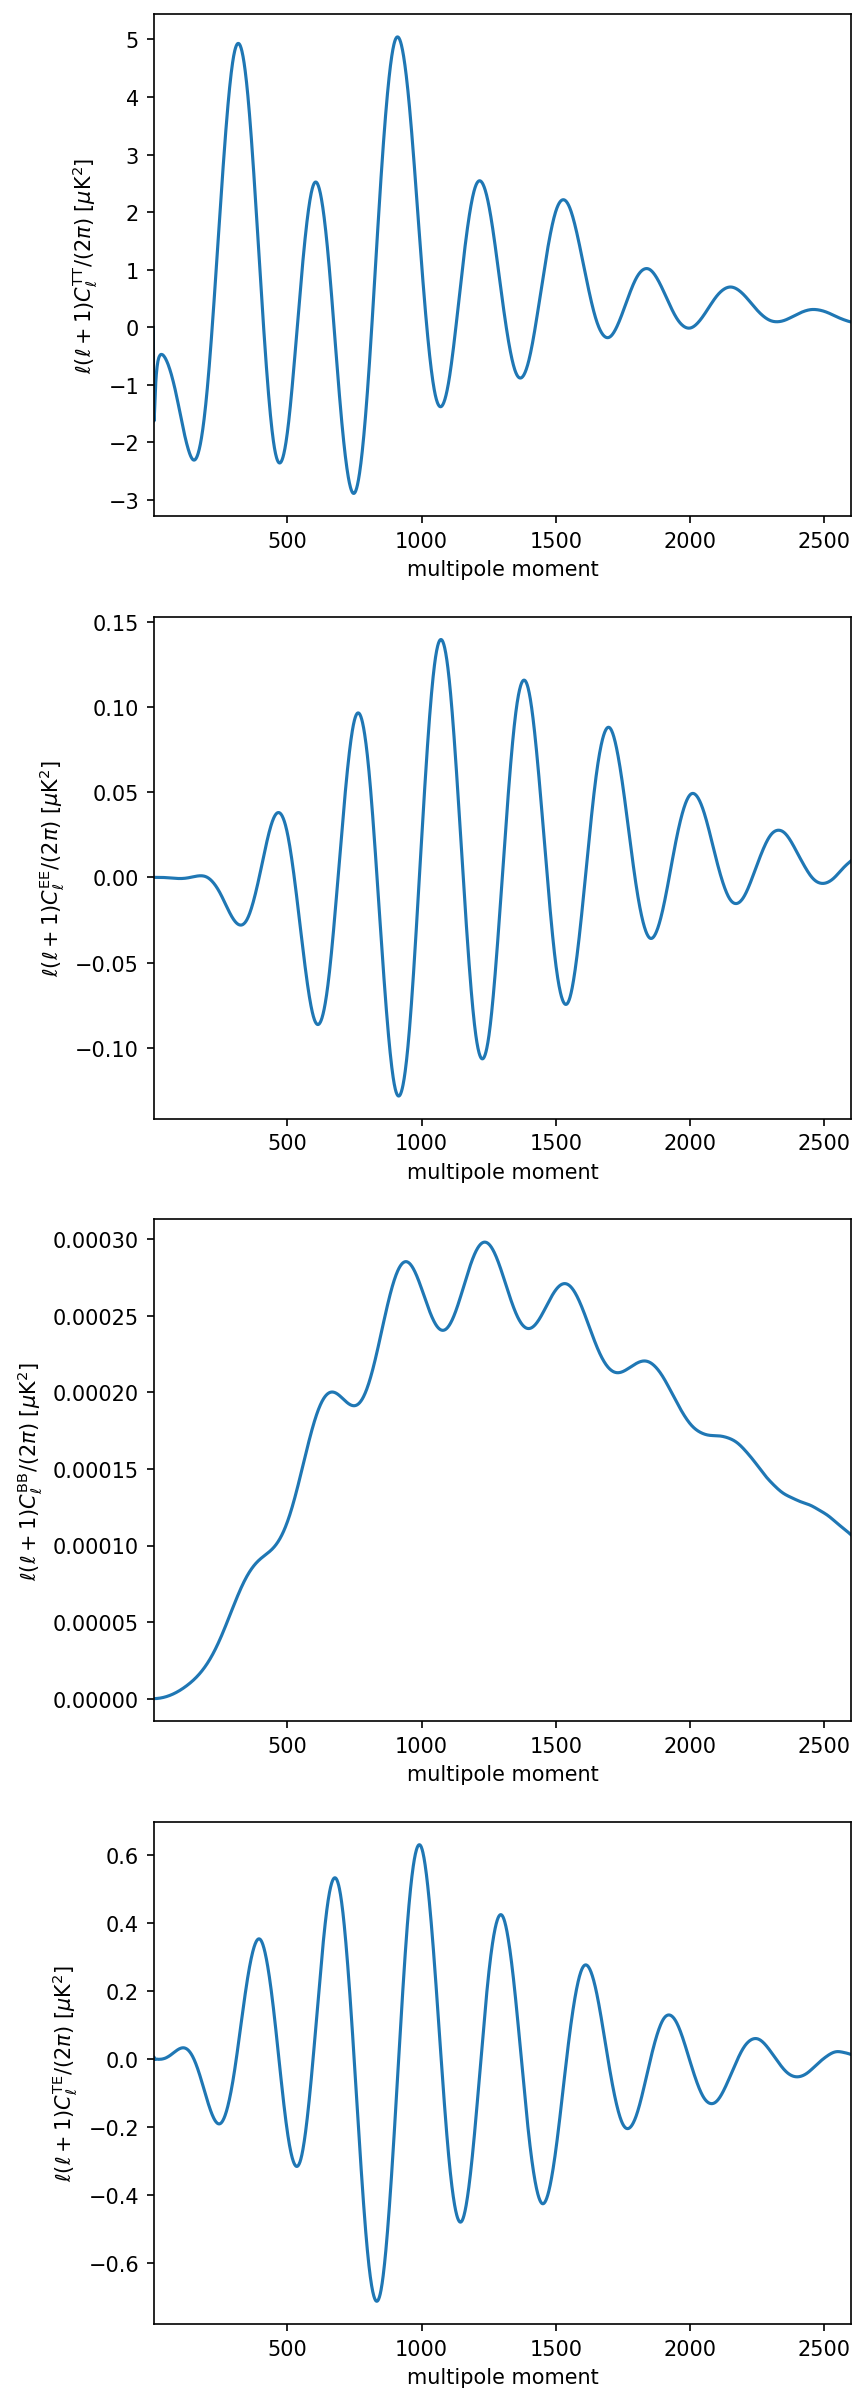

In [4]:
fig = plt.figure(figsize=(6, 20), dpi=150)
for pindx, ll in zip(range(4), ["TT", "EE", "BB", "TE"]):
    ax = fig.add_subplot(4, 1, pindx + 1)
    # starting from dipole onwards
    ax.set_xlim(2, lmax)
    ax.set_xlabel("multipole moment")
    ax.set_ylabel("$\ell(\ell+1)C_\ell^{\\rm " + ll + "}/(2\pi)$ [$\mu{\\rm K}^2$]")
    ax.plot(aL, lcdm_Cl[:, pindx] - cpl_Cl[:, pindx])